In [1]:
import pandas as pd
from utils import search_best_parameters_database, count_canny
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Counting layers with image size 256x256

In [1]:
search_best_parameters_database("../image/dbe/database_1600.csv", "../image/dbe/classify_1600")

NameError: name 'search_best_parameters_database' is not defined

In [14]:
df = pd.read_csv("../image/dbe/database_1600.csv")

def count_method(x):
    file = f"../image/dbe/classify_1600/{x}.png"
    return count_canny(file, 10, 20)

df["count_method"] = df.file.apply(count_method)
df["error"] = df["count"] - df["count_method"]
df["error_abs"] = (df["count_method"] - df["count"]).abs()

error = mean_absolute_error(df["count"].to_numpy(), df["count_method"].to_numpy())

In [15]:
df[df.error_abs <= 1].shape[0] / df.shape[0]

0.2077922077922078

In [16]:
df.error_abs.describe()

count    77.000000
mean      2.193613
std       1.255412
min       0.013672
25%       1.302734
50%       2.281250
75%       2.974609
max       5.191406
Name: error_abs, dtype: float64

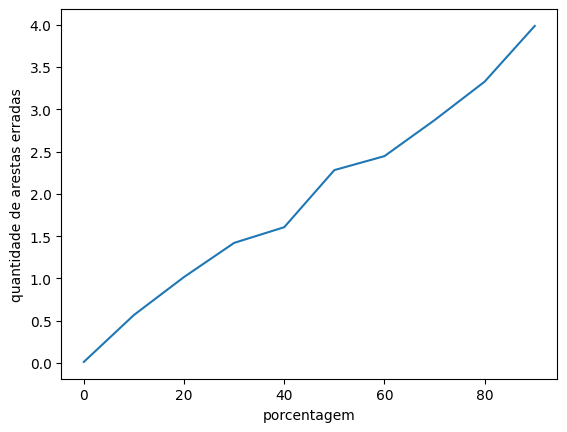

In [7]:
quantiles = np.arange(0, 1, 0.1)
y = [df.error_abs.quantile(i) for i in quantiles]

plt.plot(quantiles*100, y)
plt.ylabel("quantidade de arestas erradas")
plt.xlabel("porcentagem")
plt.show()


# Counting layers with image size 256x10

In [2]:
search_best_parameters_database("../image/dbe/database_1600.csv", "../image/dbe/classify_1600", center=True)

(10, 11, 1.974025974025974)

In [3]:
df = pd.read_csv("../image/dbe/database_1600.csv")

def count_method(x):
    file = f"../image/dbe/classify_1600/{x}.png"
    return count_canny(file, 10, 11, center=True)

df["count_method"] = df.file.apply(count_method)
df["error"] = df["count"] - df["count_method"]
df["error_abs"] = (df["count_method"] - df["count"]).abs()

error = mean_absolute_error(df["count"].to_numpy(), df["count_method"].to_numpy())

In [4]:
#usando 20 pixel no meio
df[df.error_abs <= 1].shape[0] / df.shape[0]

0.2077922077922078

In [13]:
# usando 5 pixels no meio
df[df.error_abs <= 1].shape[0] / df.shape[0]

0.3116883116883117

In [8]:
# usando 1 pixel no meio
df[df.error_abs <= 1].shape[0] / df.shape[0]

0.35064935064935066

In [5]:
df.error_abs.describe()

count    77.000000
mean      2.436364
std       1.584477
min       0.250000
25%       1.300000
50%       2.100000
75%       3.150000
max       7.450000
Name: error_abs, dtype: float64

In [9]:
df.error_abs.describe()

count    77.000000
mean      2.496753
std       1.841474
min       0.125000
25%       0.875000
50%       2.250000
75%       3.625000
max       8.000000
Name: error_abs, dtype: float64

In [5]:
df.error_abs.describe()

count    77.000000
mean      1.974026
std       1.538745
min       0.000000
25%       0.500000
50%       1.500000
75%       3.000000
max       6.500000
Name: error_abs, dtype: float64

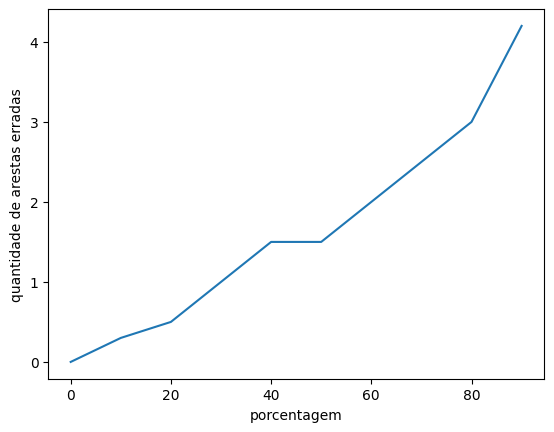

In [6]:
quantiles = np.arange(0, 1, 0.1)
y = [df.error_abs.quantile(i) for i in quantiles]

plt.plot(quantiles*100, y)
plt.ylabel("quantidade de arestas erradas")
plt.xlabel("porcentagem")
plt.show()
